In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import matplotlib.patches as patches
from pydicom import dcmread, read_file
import skimage as sk
import cv2

In [2]:
data = pd.read_csv("/media/deadwolf/BEC4-9B89/csv_crean_retina_dataset/Todo_info.csv")

In [3]:
n=len(data['class'])
print('Total de imagenes en el conjunto de datos: ',n)

Total de imagenes en el conjunto de datos:  14863


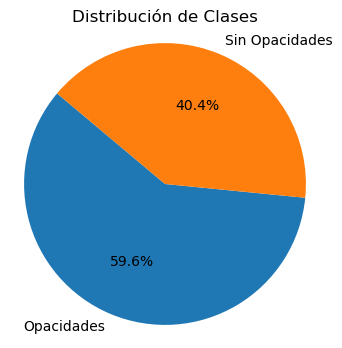

In [4]:
#Graficando la cantidad de imagenes sin opacidades hay y cuantas con presencia de opacidades
clase_counts = data['class'].value_counts()
plt.figure(figsize=(4, 4))  
# Crear la gráfica de pastel
plt.pie(clase_counts, labels=['Opacidades','Sin Opacidades'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Clases')
plt.axis('equal')
#plt.savefig('distribucion_clases.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_14917/2571429388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_opacity_data['bboxn_length'] = lung_opacity_data['bboxesn'].apply(lambda x: len(eval(x)))


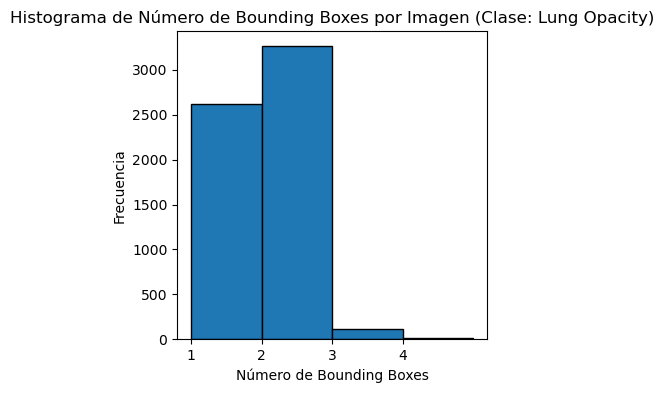

In [5]:
#generemos un histograma de la cantidad de bboxes presentes en las imagenes con neumonía
lung_opacity_data['bboxn_length'] = lung_opacity_data['bboxesn'].apply(lambda x: len(eval(x)))
plt.figure(figsize=(4, 4))
plt.hist(lung_opacity_data['bboxn_length'], bins=range(min(lung_opacity_data['bboxn_length']), max(lung_opacity_data['bboxn_length']) + 2), edgecolor='black')
plt.xlabel('Número de Bounding Boxes')
plt.ylabel('Frecuencia')
plt.title('Histograma de Número de Bounding Boxes por Imagen (Clase: Lung Opacity)')
plt.xticks(range(min(lung_opacity_data['bboxn_length']), max(lung_opacity_data['bboxn_length']) + 1))
plt.grid(False)
#plt.savefig('bboxesn_RSNA.png', bbox_inches='tight')
plt.show()

In [21]:
#Calculando el porcentaje que representa cada recuadro respecto a la imagen con opacidades por neumonia
def calcular_area_yolo(bbox):
    w = bbox[2] * 640
    h = bbox[3] * 640
    # Calcular y devolver el área del recuadro delimitador
    return w * h

area_total=640*640

porcentajes=[]
opacities= data[data['class'] == 'Lung Opacity']
for bboxes in opacities['bboxesn']:
    bbs=literal_eval(bboxes)
    for bb in bbs:
        area_bb=calcular_area_yolo(bb)
        porcent=int(round((area_bb/area_total)*100,0))
        porcentajes.append(porcent)           

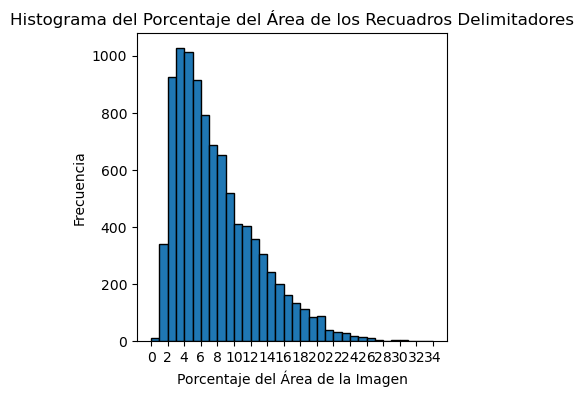

In [28]:
#Histograma de porcentajes de recuadros
plt.figure(figsize=(4, 4))
plt.hist(porcentajes, bins=range(min(porcentajes),max(porcentajes)), edgecolor='black')
plt.xticks(range(min(porcentajes), max(porcentajes), 2))
plt.xlabel('Porcentaje del Área de la Imagen')
plt.ylabel('Frecuencia')
plt.title('Histograma del Porcentaje del Área de los Recuadros Delimitadores')
plt.grid(False)
#plt.savefig('porcen_RSNA.png', bbox_inches='tight')
plt.show()

In [90]:
ruta='/home/deadwolf/Descargas/sano/0022995a-45eb-4cfa-9a59-cd15f5196c64.png'
imagen = sk.io.imread(ruta)
imagen_n= imagen.astype(np.float32) / np.max(imagen)

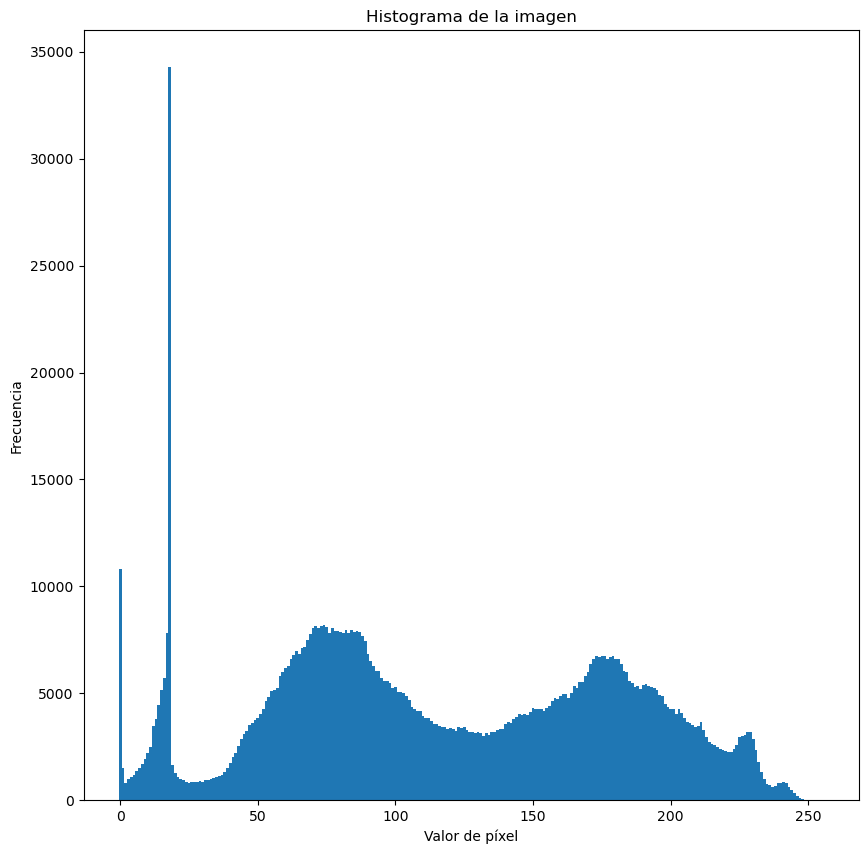

In [91]:
#Generar histograma de imagenes
histograma, bins = np.histogram(imagen.flatten(), bins=256, range=(0,256))
plt.figure(figsize=(10, 10))
plt.bar(bins[:-1], histograma, width=1)
plt.title('Histograma de la imagen')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.savefig('histo.png', bbox_inches='tight')
plt.show()

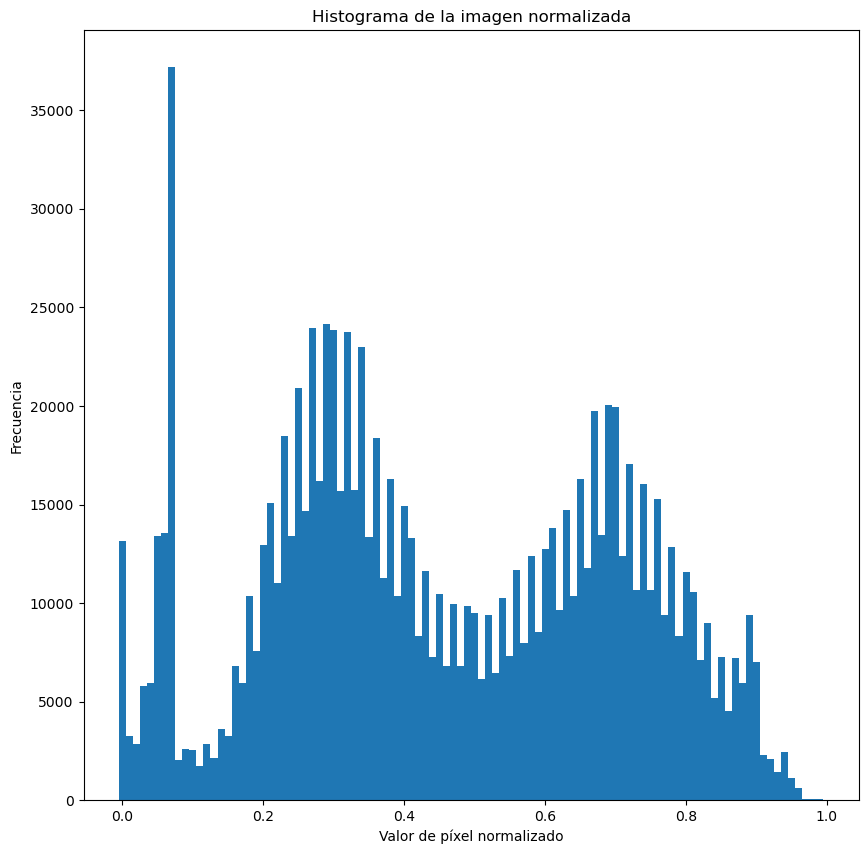

In [92]:
#Generar histograma de imagenes normalizadas
histograma, bins = np.histogram(imagen_n.flatten(), bins=100, range=(0, 1))
# Graficar el histograma
plt.figure(figsize=(10, 10))
plt.bar(bins[:-1], histograma, width=0.01)  # Ajusta el ancho de las barras
plt.title('Histograma de la imagen normalizada')
plt.xlabel('Valor de píxel normalizado')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.savefig('histo_n.png', bbox_inches='tight')
plt.show()

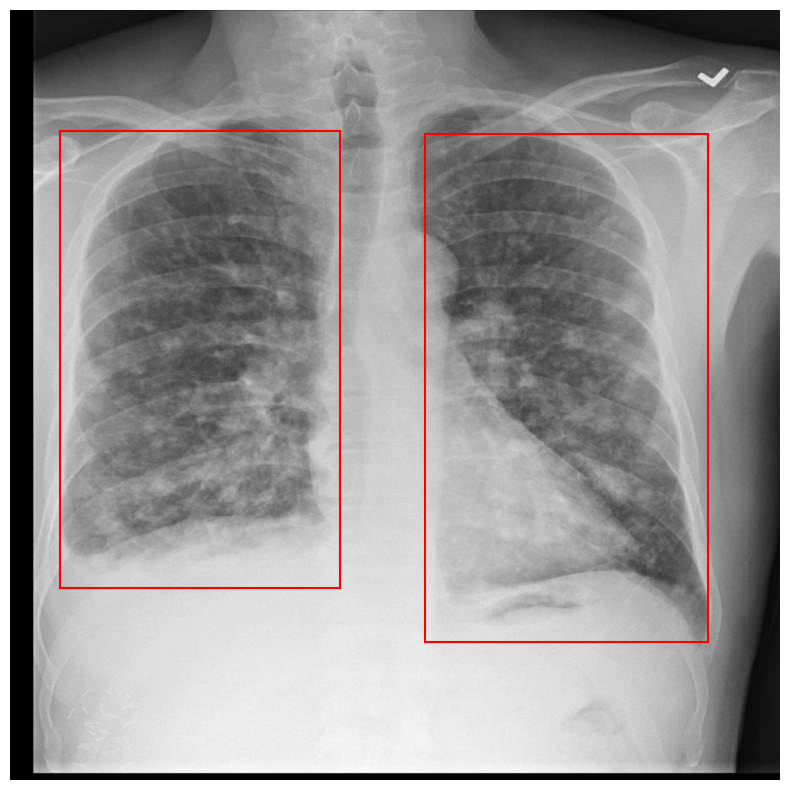

In [69]:
#Visualizar recuadros delimitadores 
def yolo_xywh(bbox):
    x = int((bbox[0] - bbox[2] / 2) * 1024)
    y = int((bbox[1] - bbox[3] / 2) * 1024)

    # Calcular ancho y altura del bounding box
    w = int(bbox[2] * 1024)
    h = int(bbox[3] * 1024)

    return [x, y, w, h]

ruta='/home/deadwolf/Descargas/enfermos/001031d9-f904-4a23-b3e5-2c088acd19c6.png'
bboxes=[[0.24658203125, 0.453125, 0.3642578125, 0.59375], [0.72265625, 0.490234375, 0.3671875, 0.66015625]]
imagen=sk.io.imread(ruta)
fig, ax = plt.subplots(figsize=(10,10), facecolor='w', edgecolor='b')
ax.imshow(imagen,cmap="gray")
ax.axis('off')

for bbox in bboxes:
    bb=yolo_xywh(bbox)
    rect = patches.Rectangle((bb[0],bb[1]),bb[2],bb[3], linewidth=1.5, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
#plt.savefig('/home/deadwolf/Descargas/enfermos/enfermo.png', bbox_inches='tight', pad_inches=0)    